In [1]:
%matplotlib inline
import sys
from os.path import exists

# this is the repository I pulled/downloaded from github: 
CONGA_PATH = '/rd2/user/xiacr/sle/source/conga/'
# confirm that it's the right level directory (since the repo and library have the same name)
assert exists(CONGA_PATH+'/README.md')
sys.path.append(CONGA_PATH)

import scanpy as sc
import conga
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# subset the CD4 t cell only

In [2]:
adata = sc.read_h5ad('../step2/all_tcell_merged_gex.h5ad')

In [3]:
adata.obs['old_index'] = adata.obs.index
adata.obs

,batch_gex_data,batch_clones_file,batch,old_index
AAACCTGAGAAGGTGA-1-0,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,0,AAACCTGAGAAGGTGA-1-0
AAACCTGAGCTAGTGG-1-0,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,0,AAACCTGAGCTAGTGG-1-0
AAACCTGAGCTCCTTC-1-0,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,0,AAACCTGAGCTCCTTC-1-0
AAACCTGAGCTGCGAA-1-0,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,0,AAACCTGAGCTGCGAA-1-0
AAACCTGAGCTTCGCG-1-0,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,0,AAACCTGAGCTTCGCG-1-0
...,...,...,...,...
TTTGTCATCGCGCCAA-1-21,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,21,TTTGTCATCGCGCCAA-1-21
TTTGTCATCGGCGCAT-1-21,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,21,TTTGTCATCGGCGCAT-1-21
TTTGTCATCTCTGCTG-1-21,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,21,TTTGTCATCTCTGCTG-1-21
TTTGTCATCTGACCTC-1-21,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,/gpfs2/gaog_pkuhpc/users/xiacr/xiehe/conga/TCR...,21,TTTGTCATCTGACCTC-1-21


In [24]:
# seu_meta.iloc[:,0]
tmp = adata.obs.batch_gex_data.str.split('/',expand=True).iloc[:,10].str.split('_',expand=True).iloc[:,0].reset_index(drop=True) # sample name
adata.obs['seu_barcode'] = 'unknown'
adata.obs['seu_barcode'] = ( tmp + '_' +adata.obs.index.str.split('1-',expand=True,n=1).to_frame().iloc[:,0].reset_index(drop=True)  + '1').to_list()
adata.obs['seu_barcode']

AAACCTGAGAAGGTGA-1-0     GW_AAACCTGAGAAGGTGA-1
AAACCTGAGCTAGTGG-1-0     GW_AAACCTGAGCTAGTGG-1
AAACCTGAGCTCCTTC-1-0     GW_AAACCTGAGCTCCTTC-1
AAACCTGAGCTGCGAA-1-0     GW_AAACCTGAGCTGCGAA-1
AAACCTGAGCTTCGCG-1-0     GW_AAACCTGAGCTTCGCG-1
                                 ...          
TTTGTCATCGCGCCAA-1-21    ZS_TTTGTCATCGCGCCAA-1
TTTGTCATCGGCGCAT-1-21    ZS_TTTGTCATCGGCGCAT-1
TTTGTCATCTCTGCTG-1-21    ZS_TTTGTCATCTCTGCTG-1
TTTGTCATCTGACCTC-1-21    ZS_TTTGTCATCTGACCTC-1
TTTGTCATCTGAGGGA-1-21    ZS_TTTGTCATCTGAGGGA-1
Name: seu_barcode, Length: 253966, dtype: object

In [35]:
cd4_seu_meta = pd.read_csv('./seurat_cd4_filter_meta.csv')
cd4_seu_meta.iloc[:,0] = cd4_seu_meta['orig.ident'] + '_' + cd4_seu_meta.iloc[:,0].str.split('_[0-9][0-9]|_[0-9]',expand=True,n=1).iloc[:,0]
seu_meta = cd4_seu_meta
seu_meta

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,group,treatment,pair,percent_mito,percent_ribo,S.Score,...,Phase,old.ident,RNA_snn_res.0.8,RNA_snn_res.1,seurat_clusters,main_type,PIC,scrublet_doublet,subtype,RNA_snn_res.0.6
0,GW_AAACCTGAGGAATCGC-1,GW,4022,1508,SLE,untreated,unpaired,1.417205,38.339135,-0.068936,...,G1,1,0,0,0,T.naive,no,False,T.CD4.naive,0
1,GW_AAACCTGCACCATCCT-1,GW,5492,2002,SLE,untreated,unpaired,2.330663,31.646031,-0.033894,...,G1,9,3,8,3,T.naive,no,False,T.CD4.Th1.cxcr3,3
2,GW_AAACCTGGTATGCTTG-1,GW,3969,1504,SLE,untreated,unpaired,1.587302,38.095238,-0.013454,...,G1,1,0,0,0,T.naive,no,False,T.CD4.naive,0
3,GW_AAACCTGGTGCATCTA-1,GW,2510,1212,SLE,untreated,unpaired,2.390438,28.167331,0.043477,...,S,2,4,5,4,T.naive,no,False,T.CD4.Th17,3
4,GW_AAACCTGTCGGACAAG-1,GW,3832,1394,SLE,untreated,unpaired,0.835073,41.362213,0.025683,...,G2M,8,9,11,9,T.naive,no,False,T.CD4.Treg,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52164,ZS_TCTCATACAGCGTCCA-1,ZS,4525,1676,HC,HC,unpaired,1.104972,38.033149,0.063563,...,S,6,3,5,3,T.naive,no,False,T.CD4.Th1.cxcr3,3
52165,ZS_TCTGAGATCTAACTCT-1,ZS,4616,1697,HC,HC,unpaired,2.772964,34.705373,0.000914,...,S,14,10,9,10,T.naive,no,False,T.CD4.IFN-response,7
52166,ZS_TCTGGAATCGCTTGTC-1,ZS,4165,1564,HC,HC,unpaired,1.536615,35.102041,0.057756,...,S,14,5,3,5,T.cyto,no,False,T.CD4.Th1,4
52167,ZS_TGTTCCGCATCCTTGC-1,ZS,5185,1391,HC,HC,unpaired,0.655738,51.340405,-0.002939,...,G1,14,10,9,10,T.naive,no,False,T.CD4.IFN-response,7


In [36]:
seu_meta.iloc[:,0].isin(adata.obs['seu_barcode']).value_counts()

True    52169
Name: Unnamed: 0, dtype: int64

In [37]:
adata.obs['seu_barcode'].isin(seu_meta.iloc[:,0]).value_counts()

False    201797
True      52169
Name: seu_barcode, dtype: int64

In [38]:
tmp = adata.obs.merge(right= seu_meta, left_on='seu_barcode',right_on='Unnamed: 0',how  = 'left')
tmp.index = tmp['seu_barcode']
adata.obs = tmp

In [39]:
adata.obs.treatment.isna().value_counts()
adata = adata[~adata.obs.treatment.isna()]

In [44]:
adata.obs = adata.obs.drop(columns='scrublet_doublet')

In [45]:
adata.obs.index = adata.obs.old_index
adata.obs.index.name  = 'cell_barcode'
adata.write_h5ad('./step2/all_cd4_merged_gex_subset.h5ad')

In [46]:
adata

AnnData object with n_obs × n_vars = 52169 × 36601
    obs: 'batch_gex_data', 'batch_clones_file', 'batch', 'old_index', 'seu_barcode', 'Unnamed: 0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'group', 'treatment', 'pair', 'percent_mito', 'percent_ribo', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'seurat_clusters', 'main_type', 'PIC', 'subtype', 'RNA_snn_res.0.6'
    var: 'gene_ids', 'feature_types', 'genome'

# Do conga analysis

In [3]:
gex_datafile = './all_cd4_merged_gex_subset.h5ad'
gex_datatype = 'h5ad' # other possibilities right now: ['10x_mtx', 'h5ad'] (h5ad from scanpy)
# tcr_datafile = './step2/' # not need
organism = 'human'

clones_file = '../step2/all_tcell_merged_clones.tsv'
kpca_file = '../step2/all_tcell_merged_clones_AB.dist_50_kpcs'
outfile_prefix = 'cd4_Tcell_filter' # this string will be prepended to results (figure and table) filenames

assert exists(gex_datafile)
assert exists(clones_file)
assert exists(kpca_file)

In [48]:
adata = conga.preprocess.read_dataset(gex_datafile, gex_datatype, clones_file ,kpca_file = kpca_file)

reading: ./step2/all_cd4_merged_gex_subset.h5ad of type h5ad


/rd2/user/xiacr/sle/source/conga/conga/preprocess.py:226: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if adata.isview: # ran into trouble with AnnData views vs copies


total barcodes: 52169 (52169, 36601)
reading: ./step2/all_tcell_merged_clones.tsv
reading: ./step2/all_tcell_merged_clones_AB.dist_50_kpcs
Reducing to the 44891 barcodes (out of 52169) with paired TCR sequence data


In [49]:
adata.uns['organism'] = organism

## filtering

In [50]:
# IF use para hvg_batch_key =  batch ?
adata = conga.preprocess.filter_and_scale( 
    adata, 
    min_genes_per_cell=200,
    max_genes_per_cell=10000,
    max_percent_mito=0.2,
    hvg_batch_key='batch'
)

filtered out 0 cells with more than 10000 genes
filtered out 0 cells with more than 0.2 percent mito
get_feature_types_varname: feature_types feature_type_counts: [('Gene Expression', 21063)]
num antibody features: 0


/home/xiacr/miniconda3/envs/conga/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'va' as categorical
/home/xiacr/miniconda3/envs/conga/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'ja' as categorical
/home/xiacr/miniconda3/envs/conga/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future ver

excluding 171 TR genes (92 variable)
excluding 1 sexlinked genes
total of 587 variable genes (44891, 21063)
Normalize and logging matrix...
get_feature_types_varname: feature_types feature_type_counts: [('Gene Expression', 587)]
feature_types counter: [('Gene Expression', 21063)]
normalize_and_log_the_raw_matrix: adata.raw.X.max()=  4449.0


In [51]:
adata = conga.preprocess.reduce_to_single_cell_per_clone(adata)

compute pca to find rep cell for each clone (44891, 587)
num_clones: 39570
normalize_and_log_the_raw_matrix:: matrix is already logged
choose representative cell for clone: 0 39570 (44891, 587)
choose representative cell for clone: 1000 39570 (44891, 587)
choose representative cell for clone: 2000 39570 (44891, 587)
choose representative cell for clone: 3000 39570 (44891, 587)
choose representative cell for clone: 4000 39570 (44891, 587)
choose representative cell for clone: 5000 39570 (44891, 587)
choose representative cell for clone: 6000 39570 (44891, 587)
choose representative cell for clone: 7000 39570 (44891, 587)
choose representative cell for clone: 8000 39570 (44891, 587)
choose representative cell for clone: 9000 39570 (44891, 587)
choose representative cell for clone: 10000 39570 (44891, 587)
choose representative cell for clone: 11000 39570 (44891, 587)
choose representative cell for clone: 12000 39570 (44891, 587)
choose representative cell for clone: 13000 39570 (44891, 5

In [52]:
adata = conga.preprocess.cluster_and_tsne_and_umap( adata, clustering_resolution = 0.8,clustering_method = 'leiden',n_gex_pcs=50)

computing X_pca_gex using sc.tl.pca
running 1D UMAP gex
ran leiden clustering: leiden_gex
running 1D UMAP tcr
ran leiden clustering: leiden_tcr


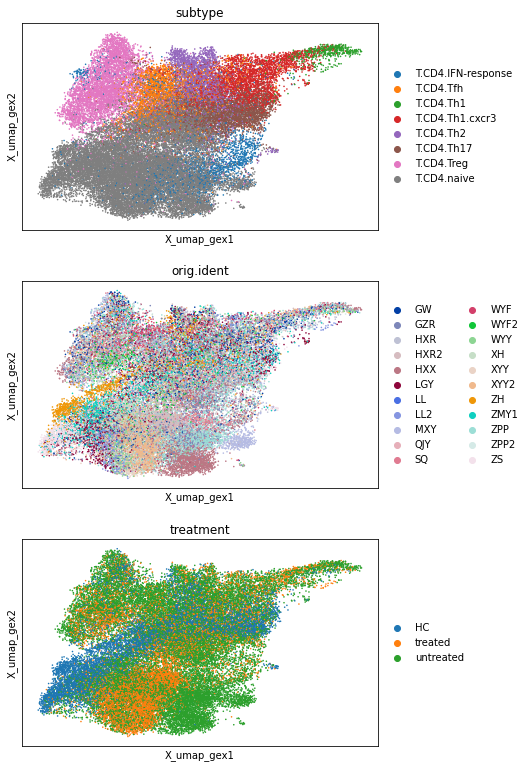

In [53]:
sc.pl.embedding(basis= 'X_umap_gex', adata = adata, color=[ 'subtype','orig.ident', 'treatment'],ncols=1,size=10 )

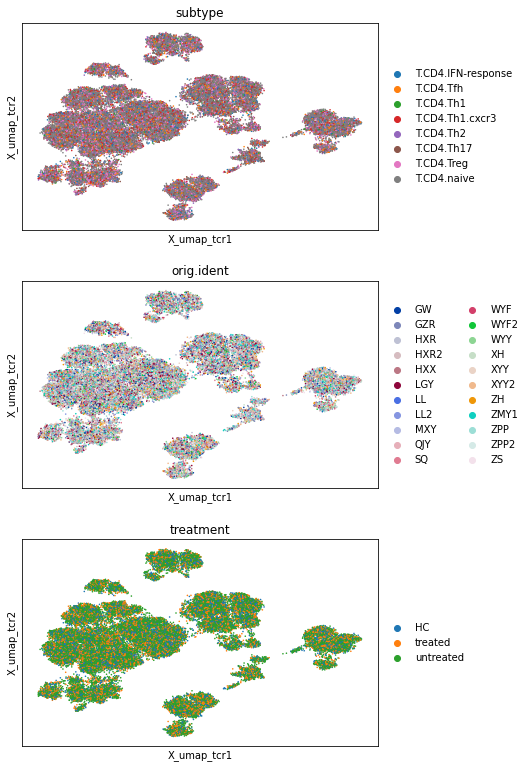

In [54]:
sc.pl.embedding(basis= 'X_umap_tcr', adata = adata, color=[ 'subtype','orig.ident', 'treatment'],ncols=1,size=10 )

In [55]:
nbr_fracs = [0.01, 0.1]

# we use this nbrhood size for computing the nndists
nbr_frac_for_nndists = 0.01

all_nbrs, nndists_gex, nndists_tcr = conga.preprocess.calc_nbrs(
    adata, nbr_fracs, also_calc_nndists=True, nbr_frac_for_nndists=nbr_frac_for_nndists)

# stash these in obs array, they are used in a few places...
adata.obs['nndists_gex'] = nndists_gex
adata.obs['nndists_tcr'] = nndists_tcr

conga.preprocess.setup_tcr_cluster_names(adata) #stores in adata.uns

allocating memory for 15630150 gex nbrs
allocated 62520600 bytes memory id= 140705685651056
allocating memory for 15630150 tcr nbrs
allocated 62520600 bytes memory id= 140705035516880
allocating memory for 156578490 gex nbrs
allocated 626313960 bytes memory id= 140705034491248
allocating memory for 156578490 tcr nbrs
allocated 626313960 bytes memory id= 140705035575824
compute D gex batch= 0 num_batches= 24 N= 39570 batch_size= 1695
argpartitions: gex batch= 0 nbr_frac= 0.01
argpartitions: gex batch= 0 nbr_frac= 0.1
compute D tcr batch= 0 num_batches= 24 N= 39570 batch_size= 1695
argpartitions: tcr batch= 0 nbr_frac= 0.01
argpartitions: tcr batch= 0 nbr_frac= 0.1
compute D gex batch= 1 num_batches= 24 N= 39570 batch_size= 1695
argpartitions: gex batch= 1 nbr_frac= 0.01
argpartitions: gex batch= 1 nbr_frac= 0.1
compute D tcr batch= 1 num_batches= 24 N= 39570 batch_size= 1695
argpartitions: tcr batch= 1 nbr_frac= 0.01
argpartitions: tcr batch= 1 nbr_frac= 0.1
compute D gex batch= 2 num_b

In [56]:
results = conga.correlations.run_graph_vs_graph(
    adata, all_nbrs, outfile_prefix=outfile_prefix)


find_neighbor_neighbor_interactions:
find_neighbor_cluster_interactions:
find_neighbor_cluster_interactions:
find_neighbor_neighbor_interactions:
find_neighbor_cluster_interactions:
find_neighbor_cluster_interactions:
saved graph_vs_graph results to tsvfile: cd4_Tcell_filter_graph_vs_graph.tsv


In [57]:
results = adata.uns['conga_results'][conga.tags.GRAPH_VS_GRAPH]
results.head() 

,conga_score,num_neighbors_gex,num_neighbors_tcr,overlap,overlap_corrected,mait_fraction,clone_index,nbr_frac,graph_overlap_type,cluster_size,gex_cluster,tcr_cluster,va,ja,cdr3a,vb,jb,cdr3b
133,4.110462e-08,NaN,3957.0,710,710,0.001408,2872,0.1,gex_cluster_vs_tcr_nbr,5590.0,3,3,TRAV12-1*01,TRAJ9*01,CVVKVNTGGFKTIF,TRBV28*01,TRBJ2-1*01,CASSLKQGRGSYNEQFF
391,8.526179e-07,NaN,3957.0,741,741,0.000000,25314,0.1,gex_cluster_vs_tcr_nbr,5960.0,1,9,TRAV35*01,TRAJ22*01,CAGRYGSARQLTF,TRBV20-1*01,TRBJ2-5*01,CSAASQETQYF
123,2.786059e-06,NaN,3957.0,737,737,0.004071,999,0.1,gex_cluster_vs_tcr_nbr,5960.0,1,12,TRAV1-2*01,TRAJ9*01,CAVRDTGGFKTIF,TRBV20-1*01,TRBJ2-7*01,CSARDRSYEQYF
327,4.600808e-06,NaN,3957.0,736,735,0.000000,19929,0.1,gex_cluster_vs_tcr_nbr,5960.0,1,17,TRAV26-1*01,TRAJ50*01,CIVKETSYDKVIF,TRBV20-1*01,TRBJ2-5*01,CSATGTAKRETQYF
284,6.137941e-06,NaN,3957.0,735,734,0.000000,18047,0.1,gex_cluster_vs_tcr_nbr,5960.0,1,9,TRAV25*01,TRAJ40*01,CAGISGTYKYIF,TRBV20-1*01,TRBJ1-1*01,CSTAGNTEAFF


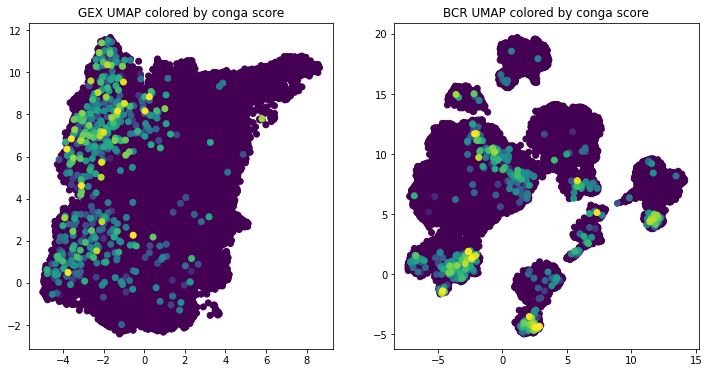

In [58]:
conga_scores = adata.obs['conga_scores']
colors = np.sqrt(np.maximum(-1*np.log10(conga_scores),0.0))
reorder = np.argsort(colors)

plt.figure(figsize=(12,6))
plt.subplot(121)
xy = adata.obsm['X_gex_2d']
plt.scatter( xy[reorder,0], xy[reorder,1], c=colors[reorder], vmin=0, vmax=np.sqrt(5))
plt.title('GEX UMAP colored by conga score')

plt.subplot(122)
xy = adata.obsm['X_tcr_2d']
plt.scatter( xy[reorder,0], xy[reorder,1], c=colors[reorder], vmin=0, vmax=np.sqrt(5))
plt.title('BCR UMAP colored by conga score');

In [28]:
# adata.write_h5ad('./subset_result/bcell_plasma_subset.h5ad')
# import pickle
# with open('./subset_result/all_nbrs.pickle', 'wb') as f:
#     pickle.dump(all_nbrs, f)

In [ ]:
nbrs_gex, nbrs_tcr = all_nbrs[0.1]

min_cluster_size = 5

conga.plotting.make_graph_vs_graph_logos(
    adata,
    outfile_prefix,
    min_cluster_size,
    nbrs_gex,
    nbrs_tcr,
)

making tcr score table, #features= 35
